# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# **Load Dataset**

In [2]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_SamsungHealth_1.csv")
df.head()

,userName,score,at,content
0,Marcelino Putra,5,2024-07-13 14:50:55,Aplikasi cukup membantu sekali memonitoring ke...
1,Afifur Rohman,5,2024-07-11 12:42:06,Cukup bagus dan sangat membantu
2,Moktar Abidin,5,2024-07-06 03:10:40,Wwconm Moktar
3,Zahratul Hayati,5,2024-07-02 15:04:41,Terima kasih Samsung! Aplikasi yang sangat mem...
4,Togo Santiago,3,2024-07-01 17:46:56,ga bisa masuk ke aplikasi pakai hp redmi 12


In [3]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,Aplikasi cukup membantu sekali memonitoring ke...
1,Cukup bagus dan sangat membantu
2,Wwconm Moktar
3,Terima kasih Samsung! Aplikasi yang sangat mem...
4,ga bisa masuk ke aplikasi pakai hp redmi 12
...,...
1995,"Tantangan dan fitur2nya sangat seru, 1 hal yan..."
1996,😊
1997,Good
1998,Kereen


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content
count,2000
unique,1202
top,Ok
freq,206


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(2000, 1)

In [7]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong

df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content    0
dtype: int64

In [11]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1202, 1)

In [12]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,cleaning
0,Aplikasi cukup membantu sekali memonitoring ke...,aplikasi cukup membantu sekali memonitoring ke...
1,Cukup bagus dan sangat membantu,cukup bagus dan sangat membantu
2,Wwconm Moktar,wwconm moktar
3,Terima kasih Samsung! Aplikasi yang sangat mem...,terima kasih samsung aplikasi yang sangat memb...
4,ga bisa masuk ke aplikasi pakai hp redmi 12,ga bisa masuk ke aplikasi pakai hp redmi
...,...,...
1992,Baguss mantaapp,baguss mantaapp
1993,ok 👍,ok
1995,"Tantangan dan fitur2nya sangat seru, 1 hal yan...",tantangan dan fiturnya sangat seru hal yang m...
1996,😊,


# **Normalization**

In [16]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "woila" : "",
        "mendem" : "tertekan",
        "sepertiurangan" : "",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "aflikasi" : "aplikasi",
        "sengkap" : "lengkap",
        "mntapp" : "mantap",
        "lncar" : "lancar",
        "pdhl" : "padahal",
        "gaes" : "guys",
        "kelen" : "kalian",
        "grgr" : "gara gara",
        "mnta" : "minta",
        "pasilitas" : "fasilitas",
        "narutodan" : "",
        "wwconm moktar" : "",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,Aplikasi cukup membantu sekali memonitoring ke...,aplikasi cukup membantu sekali memonitoring ke...,aplikasi cukup membantu sekali memonitoring ke...
1,Cukup bagus dan sangat membantu,cukup bagus dan sangat membantu,cukup bagus dan sangat membantu
2,Wwconm Moktar,wwconm moktar,
3,Terima kasih Samsung! Aplikasi yang sangat mem...,terima kasih samsung aplikasi yang sangat memb...,terima kasih samsung aplikasi yang sangat memb...
4,ga bisa masuk ke aplikasi pakai hp redmi 12,ga bisa masuk ke aplikasi pakai hp redmi,ga bisa masuk ke aplikasi pakai hp redmi
...,...,...,...
1992,Baguss mantaapp,baguss mantaapp,baguss mantaapp
1993,ok 👍,ok,ok
1995,"Tantangan dan fitur2nya sangat seru, 1 hal yan...",tantangan dan fiturnya sangat seru hal yang m...,tantangan dan fiturnya sangat seru hal yang m...
1996,😊,,


# **Stopwords**

In [17]:
# Menginstall Library Sastrawi

!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.5 MB/s eta 0:00:00


In [18]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "tidak", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana", "kapan",
                   "bagaimana", "meski", "walaupun", "seandainya", "andai", "jikalau", "kini", "dulu", "sekarang",
                   "tadi", "besok", "lusa", "satu", "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu",
                   "cukup", "lah", "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "itu","bisa"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,Aplikasi cukup membantu sekali memonitoring ke...,aplikasi cukup membantu sekali memonitoring ke...,aplikasi cukup membantu sekali memonitoring ke...,aplikasi membantu memonitoring kesehatan thank...
1,Cukup bagus dan sangat membantu,cukup bagus dan sangat membantu,cukup bagus dan sangat membantu,bagus sangat membantu
2,Wwconm Moktar,wwconm moktar,,
3,Terima kasih Samsung! Aplikasi yang sangat mem...,terima kasih samsung aplikasi yang sangat memb...,terima kasih samsung aplikasi yang sangat memb...,terima kasih samsung aplikasi sangat membantu ...
4,ga bisa masuk ke aplikasi pakai hp redmi 12,ga bisa masuk ke aplikasi pakai hp redmi,ga bisa masuk ke aplikasi pakai hp redmi,ga masuk ke aplikasi pakai hp redmi
...,...,...,...,...
1992,Baguss mantaapp,baguss mantaapp,baguss mantaapp,baguss mantaapp
1993,ok 👍,ok,ok,ok
1995,"Tantangan dan fitur2nya sangat seru, 1 hal yan...",tantangan dan fiturnya sangat seru hal yang m...,tantangan dan fiturnya sangat seru hal yang m...,tantangan fiturnya seru hal menurut kurang ad...
1996,😊,,,


# **Tokenize**

In [19]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,Aplikasi cukup membantu sekali memonitoring ke...,aplikasi cukup membantu sekali memonitoring ke...,aplikasi cukup membantu sekali memonitoring ke...,aplikasi membantu memonitoring kesehatan thank...,"[aplikasi, membantu, memonitoring, kesehatan, ..."
1,Cukup bagus dan sangat membantu,cukup bagus dan sangat membantu,cukup bagus dan sangat membantu,bagus sangat membantu,"[bagus, sangat, membantu]"
2,Wwconm Moktar,wwconm moktar,,,[]
3,Terima kasih Samsung! Aplikasi yang sangat mem...,terima kasih samsung aplikasi yang sangat memb...,terima kasih samsung aplikasi yang sangat memb...,terima kasih samsung aplikasi sangat membantu ...,"[terima, kasih, samsung, aplikasi, sangat, mem..."
4,ga bisa masuk ke aplikasi pakai hp redmi 12,ga bisa masuk ke aplikasi pakai hp redmi,ga bisa masuk ke aplikasi pakai hp redmi,ga masuk ke aplikasi pakai hp redmi,"[ga, masuk, ke, aplikasi, pakai, hp, redmi]"
...,...,...,...,...,...
1992,Baguss mantaapp,baguss mantaapp,baguss mantaapp,baguss mantaapp,"[baguss, mantaapp]"
1993,ok 👍,ok,ok,ok,[ok]
1995,"Tantangan dan fitur2nya sangat seru, 1 hal yan...",tantangan dan fiturnya sangat seru hal yang m...,tantangan dan fiturnya sangat seru hal yang m...,tantangan fiturnya seru hal menurut kurang ad...,"[tantangan, fiturnya, seru, hal, menurut, kura..."
1996,😊,,,,[]


# **Stemming**

In [20]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

df['steamming'] = df['tokenized'].apply(stemming)

df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_SamsungHealth_1.csv', index = False)


In [21]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_SamsungHealth_1.csv', encoding = 'latin1')
df_steamming

,steamming
0,aplikasi bantu memonitoring sehat thankyou sam...
1,bagus sangat bantu
2,NaN
3,terima kasih samsung aplikasi sangat bantu dal...
4,ga masuk ke aplikasi pakai hp redmi
...,...
1197,baguss mantaapp
1198,ok
1199,tantang fiturnya seru hal turut kurang adalah ...
1200,NaN


# **Translate**

In [22]:
# Menginstall Library easynmt

!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3

In [23]:
import pandas as pd
from easynmt import EasyNMT

In [24]:
# Load Data Hasil Stemming

df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_SamsungHealth_1.csv', encoding = 'latin1')


In [25]:
# Menentukan Asal & Target Bahasa yang akan diterjemahkan

source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [26]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 13.6MB/s]                   


In [27]:
# Imputing NaN Values

df_values = df_steamming.fillna(method = 'pad')
df_values

,steamming
0,aplikasi bantu memonitoring sehat thankyou sam...
1,bagus sangat bantu
2,bagus sangat bantu
3,terima kasih samsung aplikasi sangat bantu dal...
4,ga masuk ke aplikasi pakai hp redmi
...,...
1197,baguss mantaapp
1198,ok
1199,tantang fiturnya seru hal turut kurang adalah ...
1200,tantang fiturnya seru hal turut kurang adalah ...


In [28]:
# Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_SamsungHealth_1.csv')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [29]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_SamsungHealth_1.csv', index_col=0)
df_values

,steamming,steamming_en
0,aplikasi bantu memonitoring sehat thankyou sam...,help monitor healthy thanks you Samsung
1,bagus sangat bantu,Good. Very helpful.
2,bagus sangat bantu,Good. Very helpful.
3,terima kasih samsung aplikasi sangat bantu dal...,Thank you. The application really helps in ter...
4,ga masuk ke aplikasi pakai hp redmi,not logged into the application using redmi phone
...,...,...
1197,baguss mantaapp,That's great.
1198,ok,Okay.
1199,tantang fiturnya seru hal turut kurang adalah ...,The challenge is fun. What's a little bit less...
1200,tantang fiturnya seru hal turut kurang adalah ...,The challenge is fun. What's a little bit less...


# **Labeling**

In [30]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_SamsungHealth_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,aplikasi bantu memonitoring sehat thankyou sam...,help monitor healthy thanks you Samsung
1,bagus sangat bantu,Good. Very helpful.
2,bagus sangat bantu,Good. Very helpful.
3,terima kasih samsung aplikasi sangat bantu dal...,Thank you. The application really helps in ter...
4,ga masuk ke aplikasi pakai hp redmi,not logged into the application using redmi phone
...,...,...
1197,baguss mantaapp,That's great.
1198,ok,Okay.
1199,tantang fiturnya seru hal turut kurang adalah ...,The challenge is fun. What's a little bit less...
1200,tantang fiturnya seru hal turut kurang adalah ...,The challenge is fun. What's a little bit less...


In [31]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [32]:
# Import Library yang dibutuhkan

from textblob import TextBlob


In [33]:
# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 557
Netral = 525
Negatif = 120

Total Data Seluruhnya : 1202


In [34]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,aplikasi bantu memonitoring sehat thankyou sam...,help monitor healthy thanks you Samsung,Positif
1,bagus sangat bantu,Good. Very helpful.,Positif
2,bagus sangat bantu,Good. Very helpful.,Positif
3,terima kasih samsung aplikasi sangat bantu dal...,Thank you. The application really helps in ter...,Positif
4,ga masuk ke aplikasi pakai hp redmi,not logged into the application using redmi phone,Netral
...,...,...,...
1197,baguss mantaapp,That's great.,Positif
1198,ok,Okay.,Positif
1199,tantang fiturnya seru hal turut kurang adalah ...,The challenge is fun. What's a little bit less...,Positif
1200,tantang fiturnya seru hal turut kurang adalah ...,The challenge is fun. What's a little bit less...,Positif


In [35]:
# Mengimplementasikan Variabel Data Final

data_final = df_values

# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



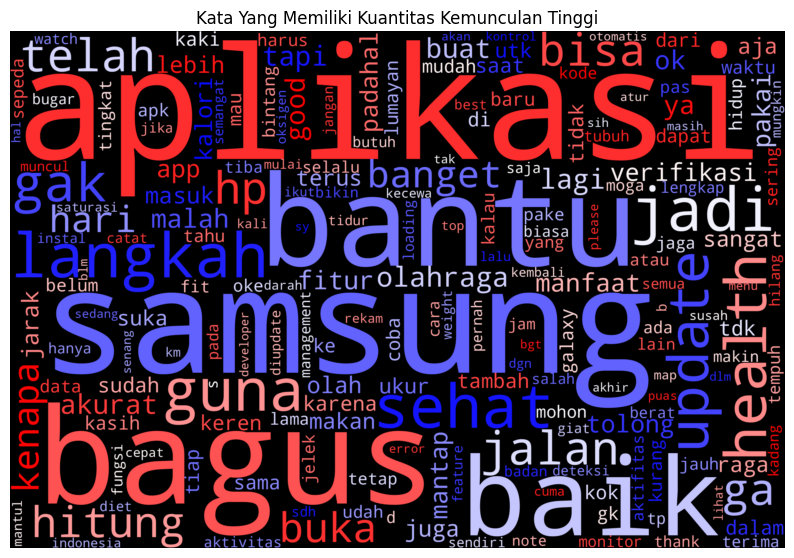

In [36]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)

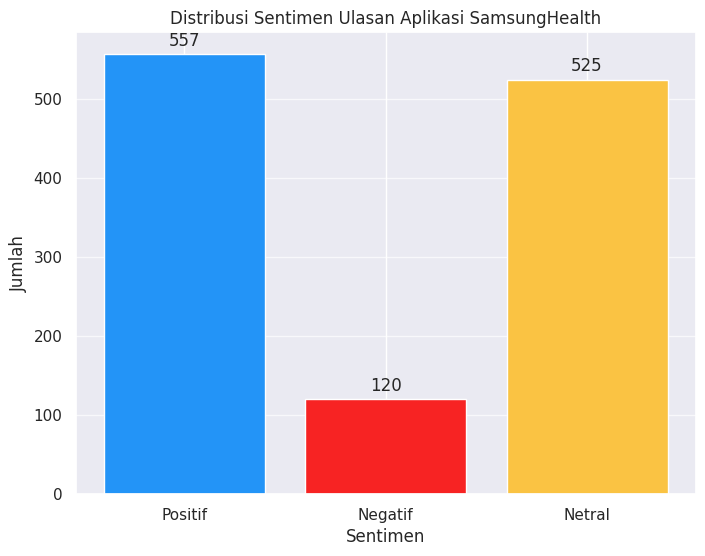

In [37]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SamsungHealth")

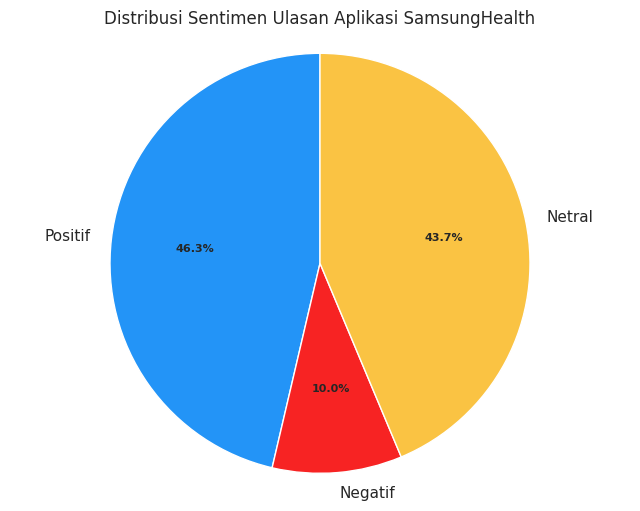

In [38]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SamsungHealth")

In [39]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
0,aplikasi bantu memonitoring sehat thankyou sam...,help monitor healthy thanks you Samsung,Positif
1,bagus sangat bantu,Good. Very helpful.,Positif
2,bagus sangat bantu,Good. Very helpful.,Positif
3,terima kasih samsung aplikasi sangat bantu dal...,Thank you. The application really helps in ter...,Positif
5,bisa buka sehingga aplikasi bisa guna baik per...,can open so the application can be for good pe...,Positif
...,...,...,...
1196,baikmembuat tubuh sehatkuatrajinterampilgembir...,well made the body healthy strong rajinterampi...,Positif
1197,baguss mantaapp,That's great.,Positif
1198,ok,Okay.,Positif
1199,tantang fiturnya seru hal turut kurang adalah ...,The challenge is fun. What's a little bit less...,Positif


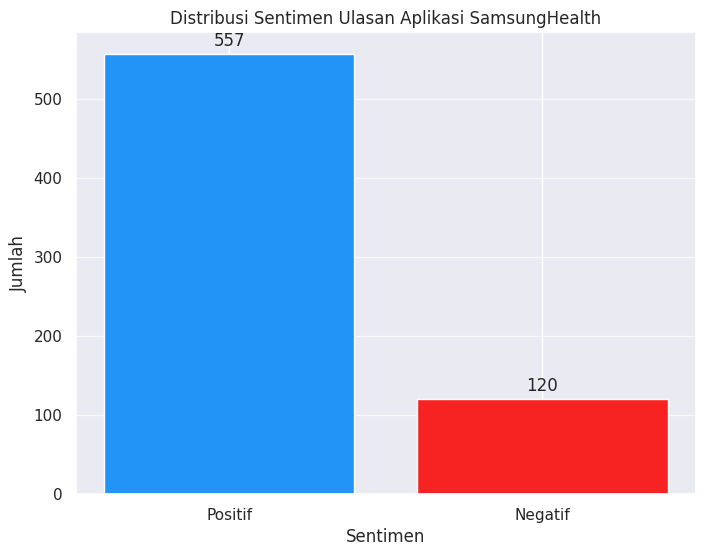

In [40]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SamsungHealth")

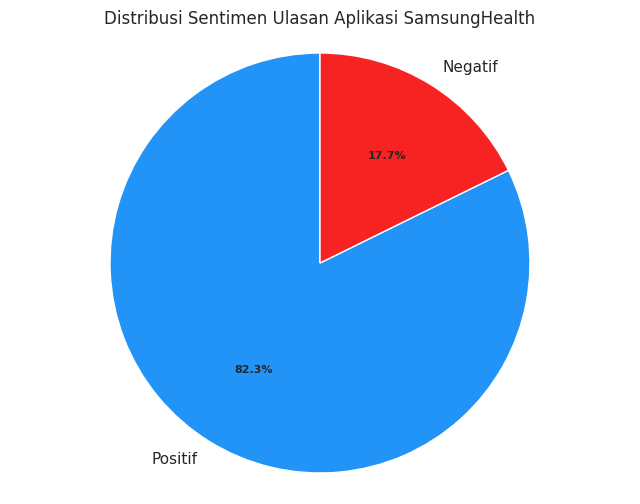

In [41]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SamsungHealth")

In [42]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
0,aplikasi bantu memonitoring sehat thankyou sam...,help monitor healthy thanks you Samsung,0
1,bagus sangat bantu,Good. Very helpful.,0
2,bagus sangat bantu,Good. Very helpful.,0
3,terima kasih samsung aplikasi sangat bantu dal...,Thank you. The application really helps in ter...,0
5,bisa buka sehingga aplikasi bisa guna baik per...,can open so the application can be for good pe...,0
...,...,...,...
1196,baikmembuat tubuh sehatkuatrajinterampilgembir...,well made the body healthy strong rajinterampi...,0
1197,baguss mantaapp,That's great.,0
1198,ok,Okay.,0
1199,tantang fiturnya seru hal turut kurang adalah ...,The challenge is fun. What's a little bit less...,0


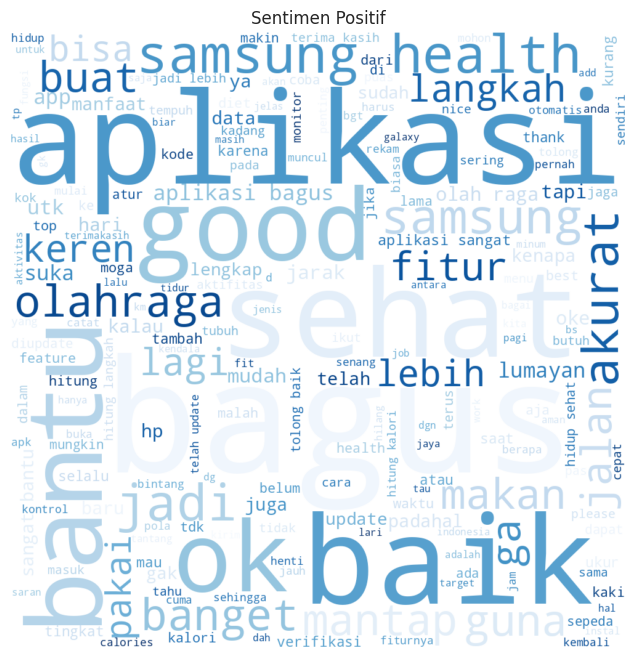

In [43]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

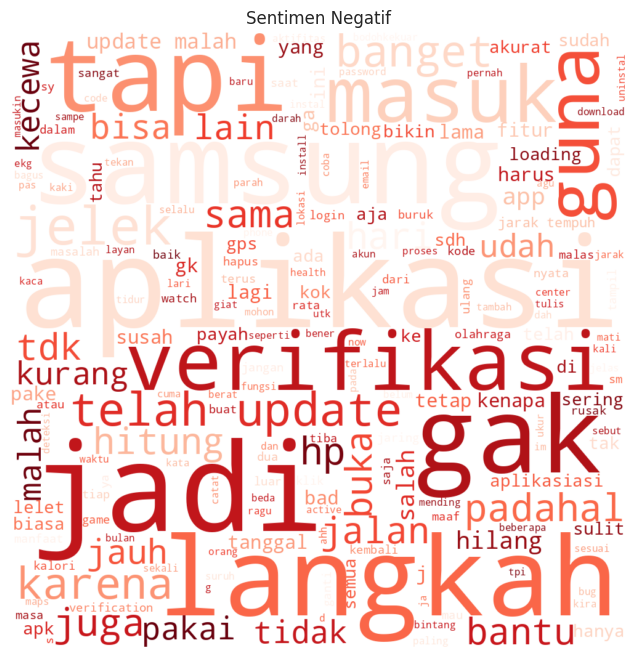

In [44]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

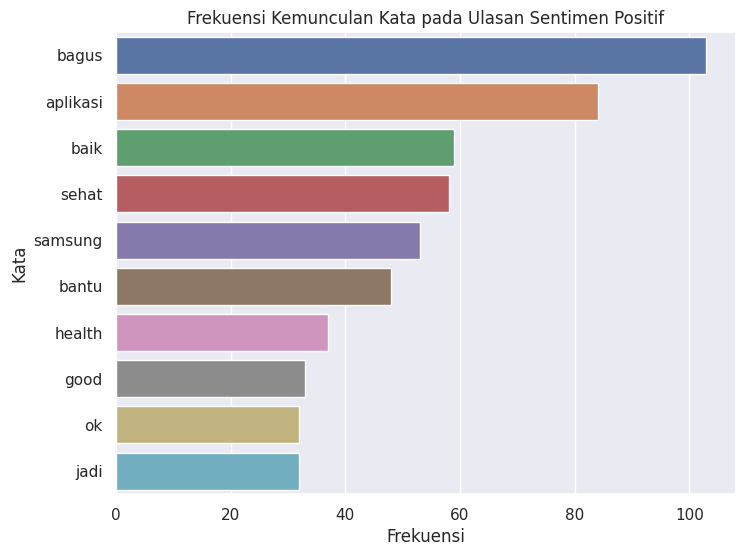

In [45]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [46]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
   bagus        103
aplikasi         84
    baik         59
   sehat         58
 samsung         53
   bantu         48
  health         37
    good         33
      ok         32
    jadi         32


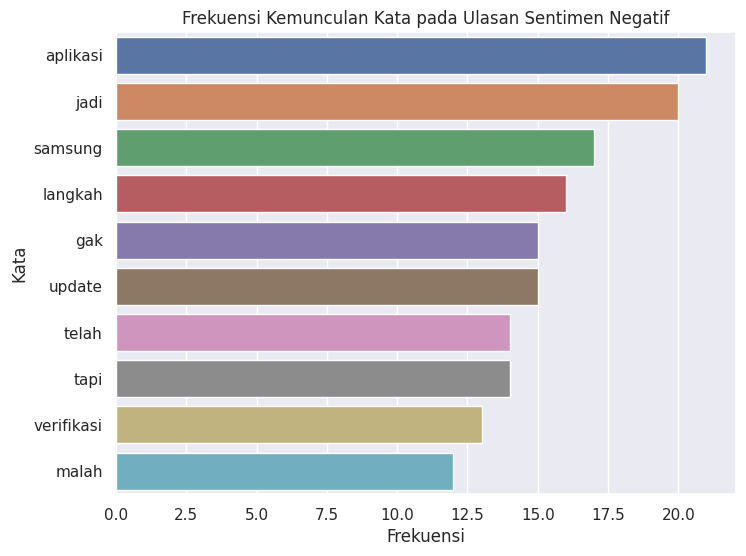

In [47]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [48]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

      kata  frekuensi
  aplikasi         21
      jadi         20
   samsung         17
   langkah         16
       gak         15
    update         15
     telah         14
      tapi         14
verifikasi         13
     malah         12


In [49]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

sentimen
0    557
1    120
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [50]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [51]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [52]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

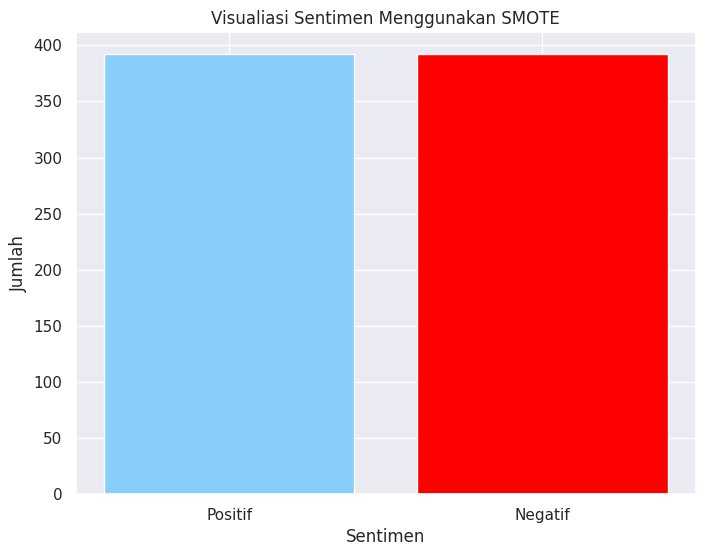

In [53]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [54]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [55]:
# Membangun Model Naive Bayes Classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [56]:
y_pred = naive_bayes.predict(X_test_vec)

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [57]:
# Classification Report

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Positif', 'Negatif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.8186274509803921

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Positif       0.92      0.85      0.88       165
     Negatif       0.52      0.69      0.59        39

    accuracy                           0.82       204
   macro avg       0.72      0.77      0.74       204
weighted avg       0.84      0.82      0.83       204



In [58]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[140  25]
 [ 12  27]]

True Positives (TP) =  140

True Negatives (TN) =  27

False Positives (FP) =  25

False Negatives (FN) =  12

Accuracy =  0.8186274509803921


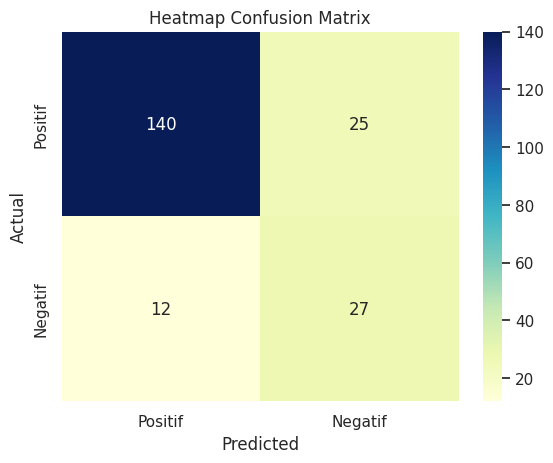

In [59]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif','Negatif'],
                         index=['Positif','Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [60]:
# Slicing Confusion Matrix

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [61]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8186


In [62]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1814


# **Testing**

In [63]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : Saya pakai hape samsung, beli samsung watch active tujuannya ingin melacak asupan kalori keluar dan masuk saya. Tapi pembaruan hari ini menghilangkan fitur Weight Management!!! Sungguh mengecewakan!!! Kembalikan fitur Weight Management!!!!
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 93.10%
Probabilitas: 93.09807609743986 %


In [68]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : Aplikasi yang sangat membantu untuk menciptakan gaya hidup sehat secara rutin. Tetap ditingkatkan kualitas performanya. Sangat direkomendasi
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 87.11%
Probabilitas: 87.10774864173936 %
